In [4]:
# load data
# abhi

from matplotlib import pyplot as plt
import numpy as np
import os
import pickle
from tqdm import tqdm

x = []
x_load = []
y = []
y_load = []


def load_data():
    count = 0
    for file in tqdm(os.listdir("/home/abhi/mainproject/quickdraw/data")):
        file = "/home/abhi/mainproject/quickdraw/data//" + file
        x = np.load(file)
        x = x.astype('float32') / 255.
        x = x[0:10000, :]
        x_load.append(x)
        y = [count for _ in range(10000)]
        count += 1
        y = np.array(y).astype('float32')
        y = y.reshape(y.shape[0], 1)
        y_load.append(y)

    return x_load, y_load


features, labels = load_data()

features = np.array(features).astype('float32')
labels = np.array(labels).astype('float32')

# shape[0] number numpy files
# shape[1] 10000
features=features.reshape(features.shape[0]*features.shape[1],features.shape[2])
# number of files * 10000 *784
# print(features.shape)

labels=labels.reshape(labels.shape[0]*labels.shape[1],labels.shape[2])
# c=0
# d=0
# f=0
# for i in labels:
#     if (i ==2) and (c==0): 
#         print ("two")
#         c=1

#     if i==1 and d==0:
#         print("one")
#         d=1
#     if i==0 and f==0:
#         print("zero")
#         f=1

with open("features", "wb") as f:
    pickle.dump(features, f, protocol=2)
with open("labels", "wb") as f:
    pickle.dump(labels, f, protocol=2)


100%|██████████| 2/2 [00:02<00:00,  1.01s/it]


(784,)
(28, 28)


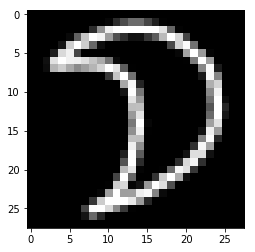

In [15]:
# Data loading manupulation
# image from dataset printing
# abhi
import numpy as np
from matplotlib import pyplot as plt
import os 
files = "/home/abhi/mainproject/quickdraw/data/full_numpy_bitmap_moon.npy"
x = np.load(files)
print(x[0].shape)
img=np.array(x[1000])
img=np.reshape(img,(28,28))
print(img.shape)
# print(img)
plt.imshow(img,cmap="gray")
plt.show()

In [5]:
# modelcreation
# abhi

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.layers import Dense,Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.utils import np_utils, print_summary
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import pickle
from keras.callbacks import TensorBoard

def keras_model(image_x, image_y):
    num_of_classes = 2
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x,image_y,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "QuickDraw.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list


def loadFromPickle():
    with open("features", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels



def prepress_labels(labels):
    labels = np_utils.to_categorical(labels)
    return labels


def main():
    features, labels = loadFromPickle()
    features, labels = shuffle(features, labels)
    labels=prepress_labels(labels)
#     print ("labels prepress",labels[1])
    train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,                                                     test_size=0.1)
    print("shape",test_x.shape)
    train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
    test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
    print("shape1",test_x.shape)
#     print("train_x[1]",train_x[0])
    model, callbacks_list = keras_model(28,28)
    print_summary(model)
    model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=3, batch_size=64,
              callbacks=[TensorBoard(log_dir="QuickDraw")])
    model.save('QuickDraw.h5')


main()


shape (2000, 784)
shape1 (2000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (Non

(784,)
(28, 28)


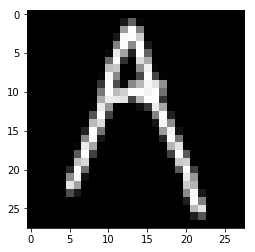

before processs (600, 600)
new image (1, 28, 28, 1)


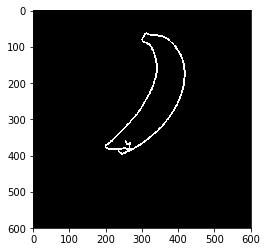

prob [1. 0.]
class  0


In [34]:
import cv2
from keras.models import load_model
import numpy as np
from matplotlib import pyplot as plt

def keras_process_image(img):
    image_x = 28
    image_y = 28
    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img

import os 
files = "/home/abhi/mainproject/quickdraw/data/full_numpy_bitmap_mountain.npy"
x = np.load(files)
print(x[0].shape)
img=np.array(x[100])
img=np.reshape(img,(28,28))
print(img.shape)
# print(img)
plt.imshow(img,cmap="gray")
plt.show()
test1=cv2.imread("test/moon.jpg",0)

model=load_model("QuickDraw.h5")
test1=cv2.bitwise_not(test1)
print("before processs",test1.shape)
# test=np.reshape(new_img,(28,28))

# print(test.shape)

new_img=keras_process_image(test1)
print("new image",new_img.shape)
plt.imshow(test1,cmap="gray")
plt.show()
pred_probab = model.predict(new_img)[0]
print("prob",pred_probab)
pred_class = list(pred_probab).index(max(pred_probab))
print("class ",pred_class)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


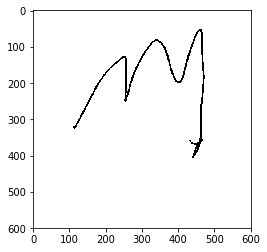

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


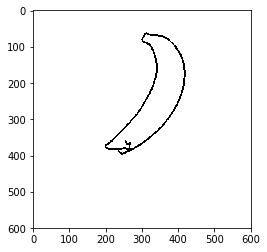

In [6]:
# drawing  using pen
# abhi

import numpy as np
import cv2
from collections import deque
from matplotlib import pyplot as plt

# Define the upper and lower boundaries for a color to be considered "Blue"
blueLower = np.array([100, 60, 60])
blueUpper = np.array([140, 255, 255])

# Define a 5x5 kernel for erosion and dilation
kernel = np.ones((5, 5), np.uint8)

# Setup deques to store separate colors in separate arrays
points = deque(maxlen=512)

# Setup the Paint interface
paintWindow = np.zeros((600,600,3)) + 255 #paint window

# cv2.imshow(i,paintWindow)



x=0
# Load the video
camera = cv2.VideoCapture(0)

# Keep looping
while True:
    # Grab the current paintWindow
    key = cv2.waitKey(1)
    (grabbed, frame) = camera.read()
    frame = cv2.flip(frame, 1)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Check to see if we have reached the end of the video
    if not grabbed:
        break

    # Determine which pixels fall within the blue boundaries and then blur the binary image
    blueMask = cv2.inRange(hsv, blueLower, blueUpper)
    blueMask = cv2.erode(blueMask, kernel, iterations=2)
    blueMask = cv2.morphologyEx(blueMask, cv2.MORPH_OPEN, kernel)
    blueMask = cv2.dilate(blueMask, kernel, iterations=1)

    # Find contours in the image
    cnts, x  = cv2.findContours(blueMask.copy(), cv2.RETR_EXTERNAL,
    	cv2.CHAIN_APPROX_SIMPLE)
    center = None

    # Check to see if any contours were found
    if len(cnts) > 0:
    	# Sort the contours and find the largest one -- we
    	# will assume this contour correspondes to the area of the bottle cap
        cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
        # Get the radius of the enclosing circle around the found contour
        ((x, y), radius) = cv2.minEnclosingCircle(cnt)
        # Draw the circle around the contour
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
        # Get the moments to calculate the center of the contour (in this case Circle)
        M = cv2.moments(cnt)
        
        #finding the center of the circle
        center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))
    points.appendleft(center)
    # Append the next deque when no contours are detected (i.e., bottle cap reversed,blue not detected
    for i in range(1,len(points)):
        if points[i-1] is None or points[i] is None:
            continue
        cv2.line(frame, points[i - 1], points[i], (255, 0, 0), 2)
        cv2.line(paintWindow, points[i - 1], points[i], (0, 0, 0), 3)
                

    # Show the frame and the paintWindow image
    cv2.imshow("Tracking_frame", frame)
    cv2.imshow("PaintWindow", paintWindow)
    
    if key & 0xFF == ord('r'):
        points = deque(maxlen=512)
        paintWindow[:,:,:] = 255
    if key & 0xFF == ord('c'):
            plt.imshow(paintWindow)
            plt.show()
            cv2.imwrite(str(x)+".jpg",paintWindow)
	# If the 'q' key is pressed, stop the loop
    if key == 27:
        break

# Cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()


In [1]:
import cv2
from keras.models import load_model
import numpy as np
from collections import deque
import os

model = load_model('QuickDraw.h5')


def main():
    emojis = get_QD_emojis()
    cap = cv2.VideoCapture(0)
    Lower_green = np.array([100, 60, 60])
    Upper_green = np.array([140, 255, 255])
    pts = deque(maxlen=512)
    blackboard = np.zeros((480, 640, 3), dtype=np.uint8)
    digit = np.zeros((200, 200, 3), dtype=np.uint8)
    pred_class = 0

    while (cap.isOpened()):
        ret, img = cap.read()
        img = cv2.flip(img, 1)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.inRange(hsv, Lower_green, Upper_green)
        mask = cv2.erode(mask, kernel, iterations=2)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        # mask=cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)
        mask = cv2.dilate(mask, kernel, iterations=1)
        res = cv2.bitwise_and(img, img, mask=mask)
        cnts, heir = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
        center = None

        if len(cnts) >= 1:
            cnt = max(cnts, key=cv2.contourArea)
            if cv2.contourArea(cnt) > 200:
                ((x, y), radius) = cv2.minEnclosingCircle(cnt)
                cv2.circle(img, (int(x), int(y)), int(radius), (0, 255, 255), 2)
                cv2.circle(img, center, 5, (0, 0, 255), -1)
                M = cv2.moments(cnt)
                center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))
                pts.appendleft(center)
                for i in range(1, len(pts)):
                    if pts[i - 1] is None or pts[i] is None:
                        continue
                    cv2.line(blackboard, pts[i - 1], pts[i], (255, 255, 255), 7)
                    cv2.line(img, pts[i - 1], pts[i], (0, 0, 255), 2)
        elif len(cnts) == 0:
            if len(pts) != []:
                blackboard_gray = cv2.cvtColor(blackboard, cv2.COLOR_BGR2GRAY)
                blur1 = cv2.medianBlur(blackboard_gray, 15)
                blur1 = cv2.GaussianBlur(blur1, (5, 5), 0)
                thresh1 = cv2.threshold(blur1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
                blackboard_cnts, i = cv2.findContours(thresh1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#                 print ('black',blackboard_cnts)
#                 print('thresh',thresh1)
                if len(blackboard_cnts) >= 1:   
                    cnt = max(blackboard_cnts, key=cv2.contourArea)
                    print(cv2.contourArea(cnt))
                    if cv2.contourArea(cnt) > 2000:
                        x, y, w, h = cv2.boundingRect(cnt)
                        digit = blackboard_gray[y:y + h, x:x + w]
                        print("digit",digit.shape)
                        pred_probab, pred_class = keras_predict(model, digit)
                        print("predications")
                        print("class",pred_class,"prob", pred_probab)

            pts = deque(maxlen=512)
            blackboard = np.zeros((480, 640, 3), dtype=np.uint8)
            img = overlay(img, emojis[pred_class], 400, 250, 100, 100)
        cv2.imshow("Frame", img)
        k = cv2.waitKey(10)
        if k == 27:
            break


def keras_predict(model, image):
    processed = keras_process_image(image)
    print("processed: " + str(processed.shape))
    pred_probab = model.predict(processed)[0]
    print("prob",pred_probab)
    pred_class = list(pred_probab).index(max(pred_probab))
    print(pred_class)
    return max(pred_probab), pred_class


def keras_process_image(img):
    image_x = 28
    image_y = 28
    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img


def get_QD_emojis():
    emojis_folder = 'qd_emo/'
    emojis = []
    for emoji in range(len(os.listdir(emojis_folder))):
        print("emoji",emoji)
        emojis.append(cv2.imread(emojis_folder + str(emoji) + '.png', -1))
    return emojis


def overlay(image, emoji, x, y, w, h):
    emoji = cv2.resize(emoji, (w, h))
    try:
        image[y:y + h, x:x + w] = blend_transparent(image[y:y + h, x:x + w], emoji)
    except:
        pass
    return image


def blend_transparent(face_img, overlay_t_img):
    # Split out the transparency mask from the colour info
    overlay_img = overlay_t_img[:, :, :3]  # Grab the BRG planes
    overlay_mask = overlay_t_img[:, :, 3:]  # And the alpha plane

    # Again calculate the inverse mask
    background_mask = 255 - overlay_mask

    # Turn the masks into three channel, so we can use them as weights
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

    # Create a masked out face image, and masked out overlay
    # We convert the images to floating point in range 0.0 - 1.0
    face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
    overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

    # And finally just add them together, and rescale it back to an 8bit integer image
    return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))


keras_predict(model, np.zeros((50, 50, 1), dtype=np.uint8))
if __name__ == '__main__':
    main()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
processed: (1, 28, 28, 1)
prob [0.7221577  0.27784228]
0
emoji 0
emoji 1
emoji 2
emoji 3
emoji 4
emoji 5
emoji 6
emoji 7
emoji 8
emoji 9
emoji 10
emoji 11
emoji 12
emoji 13
emoji 14
emoji 15
5327.5
digit (96, 139)
processed: (1, 28, 28, 1)
prob [1.000000e+00 2.720236e-27]
0
predications
class 0 prob 1.0
10631.0
digit (435, 337)
processed: (1, 28, 28, 1)
prob [0. 1.]
1
predications
class 1 prob 1.0
67273.0
digit (348, 537)
processed: (1, 28, 28, 1)
prob [1. 0.]
0
predications
class 0 prob 1.0
63337.5
digit (383, 504)
processed: (1, 28, 28, 1)
prob [1. 0.]
0
predications
class 0 prob 1.0


In [ ]:
import numpy as np
x=np.zeros((2,3,4))
print(x.shape)

In [ ]:
x=[1,2,3,4,5,6]
x = [0:2, :] 


In [1]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt


def main():
    area=(100,100,300,300)
    paintWindow = np.zeros((471,656,3)) + 255 #paint window

    # cv2.namedWindow('Paint', cv2.WINDOW_AUTOSIZE)
    img=cv2.imread('images/home1.jpg',cv2.COLOR_BGR2HSV)
    print(len(img.shape))
    print(len(paintWindow.shape))
#     i=np.reshape(i,(400,400,-1))
  
    print(paintWindow.shape)
    plt.imshow(img,cmap='gray')
    plt.show()
    camera = cv2.VideoCapture(0)

    
    # Keep looping
    while True:
        # Grab the current paintWindow
        key = cv2.waitKey(1)
        (grabbed, frame) = camera.read()
        frame = cv2.flip(frame, 1)
        image = Image.fromarray(paintWindow.astype('uint8'), 'RGB')
        image.paste(img,area)
        cv2.imshow(image)
        if key == 27:
            break

    # Cleanup the camera and close any open windows
    camera.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    main()

3
3
(471, 656, 3)


<Figure size 640x480 with 1 Axes>

SystemError: new style getargs format but argument is not a tuple